# Capstone Project

**Overview**: In this Capstone application, 

* A general idea of the question 
* An initial guess at what data you will need to answer that question
* An initial guess as to how you will source that data
* Come up with a solution/model


### Getting Started
**CRISP-DM Framework**
To frame the task, throughout my practical applications I will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.

My dataset comes from the kaggle repository [link](https://www.kaggle.com/code/abrahamanderson/hearth-disease-prediction/datag).  
The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.


### Business Understanding
**Below is a succinct explanation of the business problem in one sentence.**

```Based on the health data available for someone, identify if that person has a 10-year risk of future coronary heart disease (CHD).```

### Understanding the Data
The first step in this process is to read the data, visualize the date and understand the features 

##### The dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010

### 1. Read the data

Use pandas to read in the dataset `heart.csv` and assign to a meaningful variable name.

In [1]:
#Data reading and visaulizing tools
import numpy as np
import math
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#preprocessing tools
from sklearn.preprocessing import StandardScaler,OneHotEncoder, OrdinalEncoder, LabelEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.feature_selection import SelectFromModel, SequentialFeatureSelector
from sklearn.tree import export_text, plot_tree,export_graphviz

#models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#models performance evaulation tools
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

#additional tools
from sklearn.metrics.pairwise import polynomial_kernel, rbf_kernel

from sklearn import set_config
set_config(display='diagram')


In [2]:
df = pd.read_csv('data/heart.csv')

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### 2. Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

Demographic:
• Sex: male or female(Nominal)
• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
Behavioral
• Current Smoker: whether or not the patient is a current smoker (Nominal)
• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
Medical( history)
• BP Meds: whether or not the patient was on blood pressure medication (Nominal)
• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
• Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
• Tot Chol: total cholesterol level (Continuous)
• Sys BP: systolic blood pressure (Continuous)
• Dia BP: diastolic blood pressure (Continuous)
• BMI: Body Mass Index (Continuous)
• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
• Glucose: glucose level (Continuous)
Predict variable (desired target)
• 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)
```



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


All values are numaric

In [5]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

dropping duration column as this will not be present for prediction

In [6]:
df.describe(include="all").transpose()

,count,mean,std,min,25%,50%,75%,max
male,4238.0,0.429212,0.495022,0.00,0.00,0.0,1.000,1.0
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.000,70.0
education,4133.0,1.978950,1.019791,1.00,1.00,2.0,3.000,4.0
currentSmoker,4238.0,0.494101,0.500024,0.00,0.00,0.0,1.000,1.0
cigsPerDay,4209.0,9.003089,11.920094,0.00,0.00,0.0,20.000,70.0
BPMeds,4185.0,0.029630,0.169584,0.00,0.00,0.0,0.000,1.0
prevalentStroke,4238.0,0.005899,0.076587,0.00,0.00,0.0,0.000,1.0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.0,1.000,1.0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.0,0.000,1.0
totChol,4188.0,236.721585,44.590334,107.00,206.00,234.0,263.000,696.0


In [7]:
df.corr()["TenYearCHD"].sort_values(ascending=False)


TenYearCHD         1.000000
age                0.225256
sysBP              0.216429
prevalentHyp       0.177603
diaBP              0.145299
glucose            0.125544
diabetes           0.097317
male               0.088428
BPMeds             0.087489
totChol            0.082184
BMI                0.075192
prevalentStroke    0.061810
cigsPerDay         0.057884
heartRate          0.022913
currentSmoker      0.019456
education         -0.054059
Name: TenYearCHD, dtype: float64

According to these values above and in the figure below,people will be tend to hearth disease if

they are older                
they have higher systolic blood pressure 
they are hypertensive 
they have higher diastolic blood pressure
they have higher glucose level glucose           
they have diabetes           
they are males  

<AxesSubplot:>

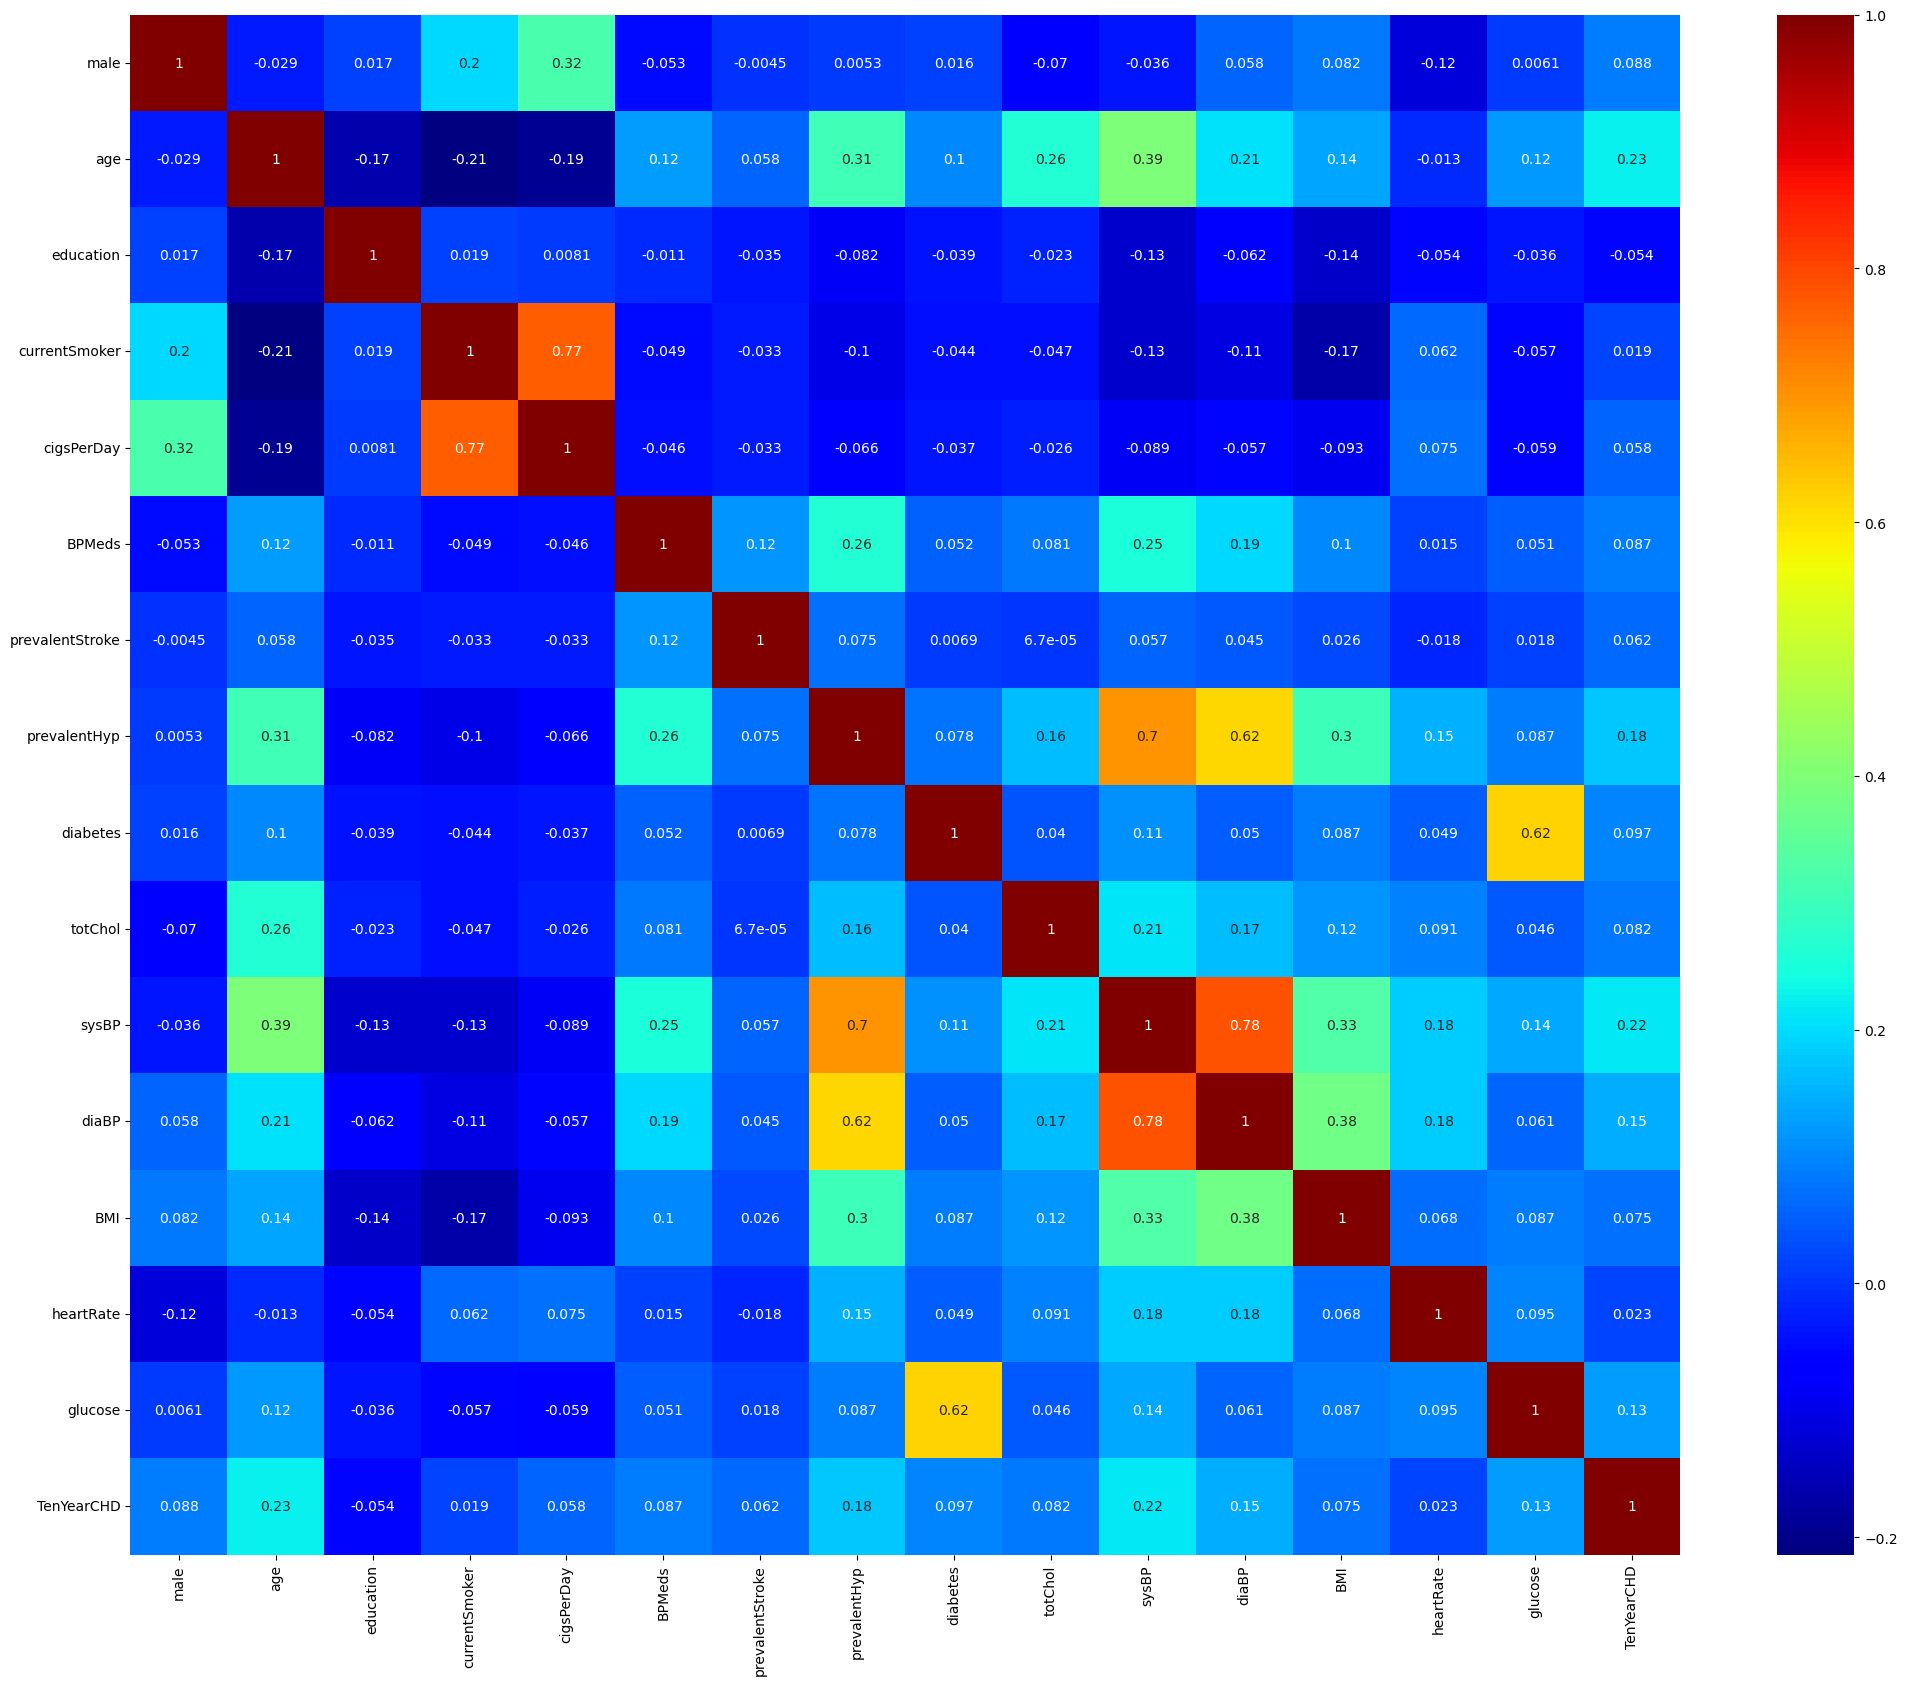

In [8]:
#Lets visualize overall correlations between all columns with each other
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),cmap="jet",annot=True,linewidths=0, linecolor='white',cbar=True)

### 3. Data Visualization

0    3594
1     644
Name: TenYearCHD, dtype: int64


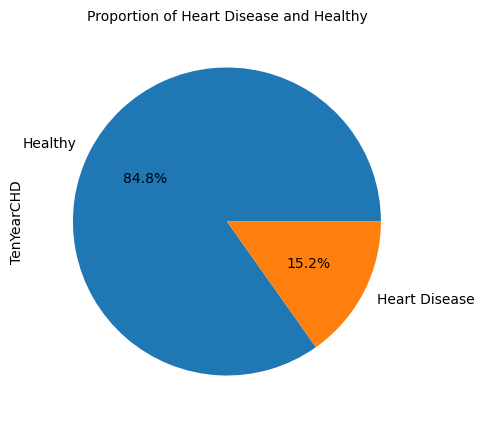

In [9]:
print(df["TenYearCHD"].value_counts())
labels = 'Healthy', 'Heart Disease'
plt.title("Proportion of Heart Disease and Healthy", size = 10)
df["TenYearCHD"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(5,5), labels=labels);

<AxesSubplot:ylabel='Frequency'>

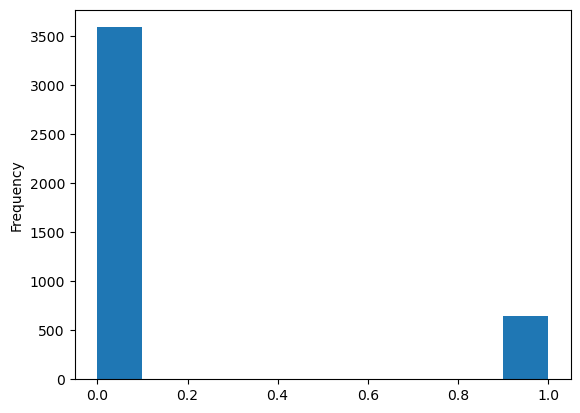

In [10]:
df['TenYearCHD'].plot(kind='hist')


<font color="green">
So about 15.2% of the people have disease while 84.8% have have not. So the baseline model could be to predict that 15.2% of people have disease. This means that we have unbalanced target which can affect the performance of the machine learning algorithm and its predictions negatively if we do not deal with this issue.

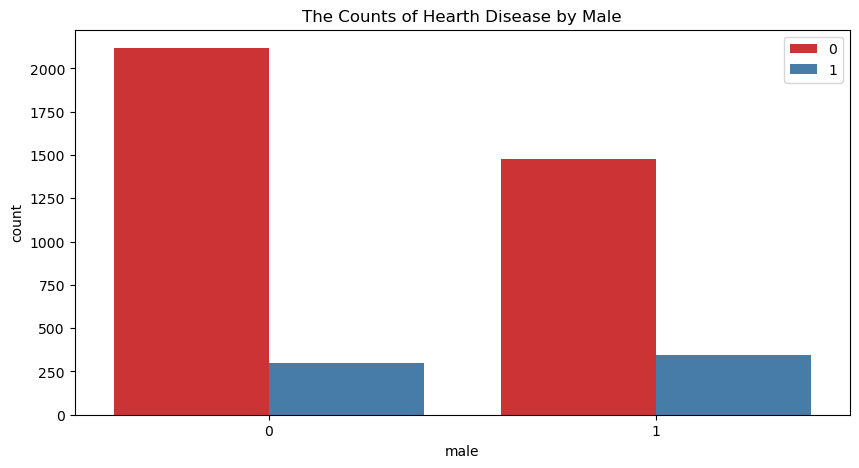

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(x="male",hue="TenYearCHD", data=df, palette="Set1")
plt.title("The Counts of Hearth Disease by Male")
plt.legend()

Text(0.5, 1.0, 'The Counts of Hearth Disease by systolic blood pressure ')

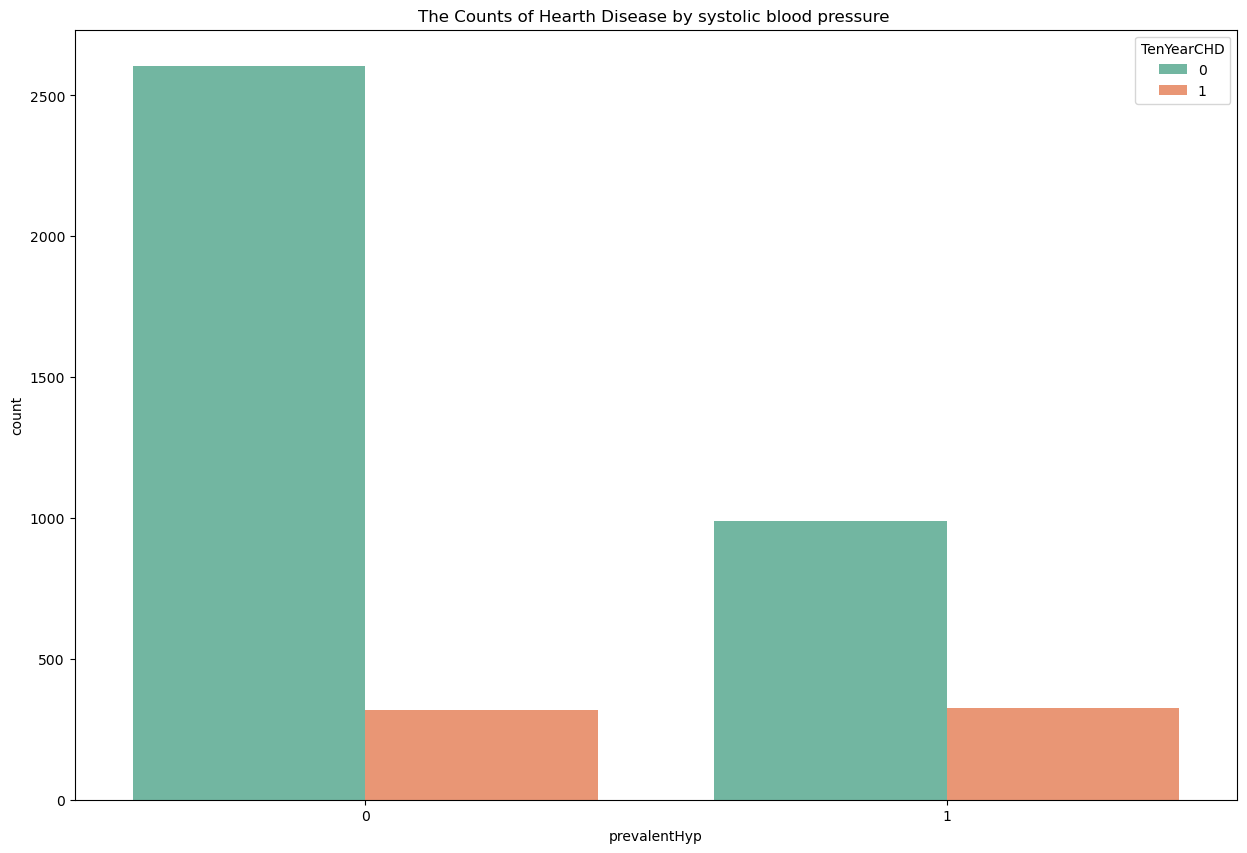

In [12]:
plt.figure(figsize=(15,10))
sns.countplot(x="prevalentHyp", hue="TenYearCHD", data=df,palette="Set2")
plt.title("The Counts of Hearth Disease by systolic blood pressure ")

Text(0.5, 1.0, 'Distribution of  diastolic blood pressure by Heart Disease')

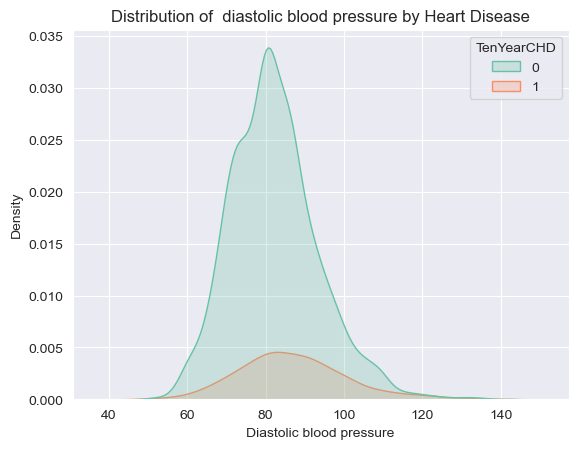

In [13]:
sns.set_style("darkgrid")
sns.kdeplot(x="diaBP",data=df,palette="Set2",hue="TenYearCHD",shade=True)
sns.set(rc={'figure.figsize':(20,12)})
plt.ylabel('Density');
plt.xlabel('Diastolic blood pressure');
plt.title('Distribution of  diastolic blood pressure by Heart Disease')

Text(0.5, 1.0, 'Distribution of  systolic blood pressure  by Heart Disease')

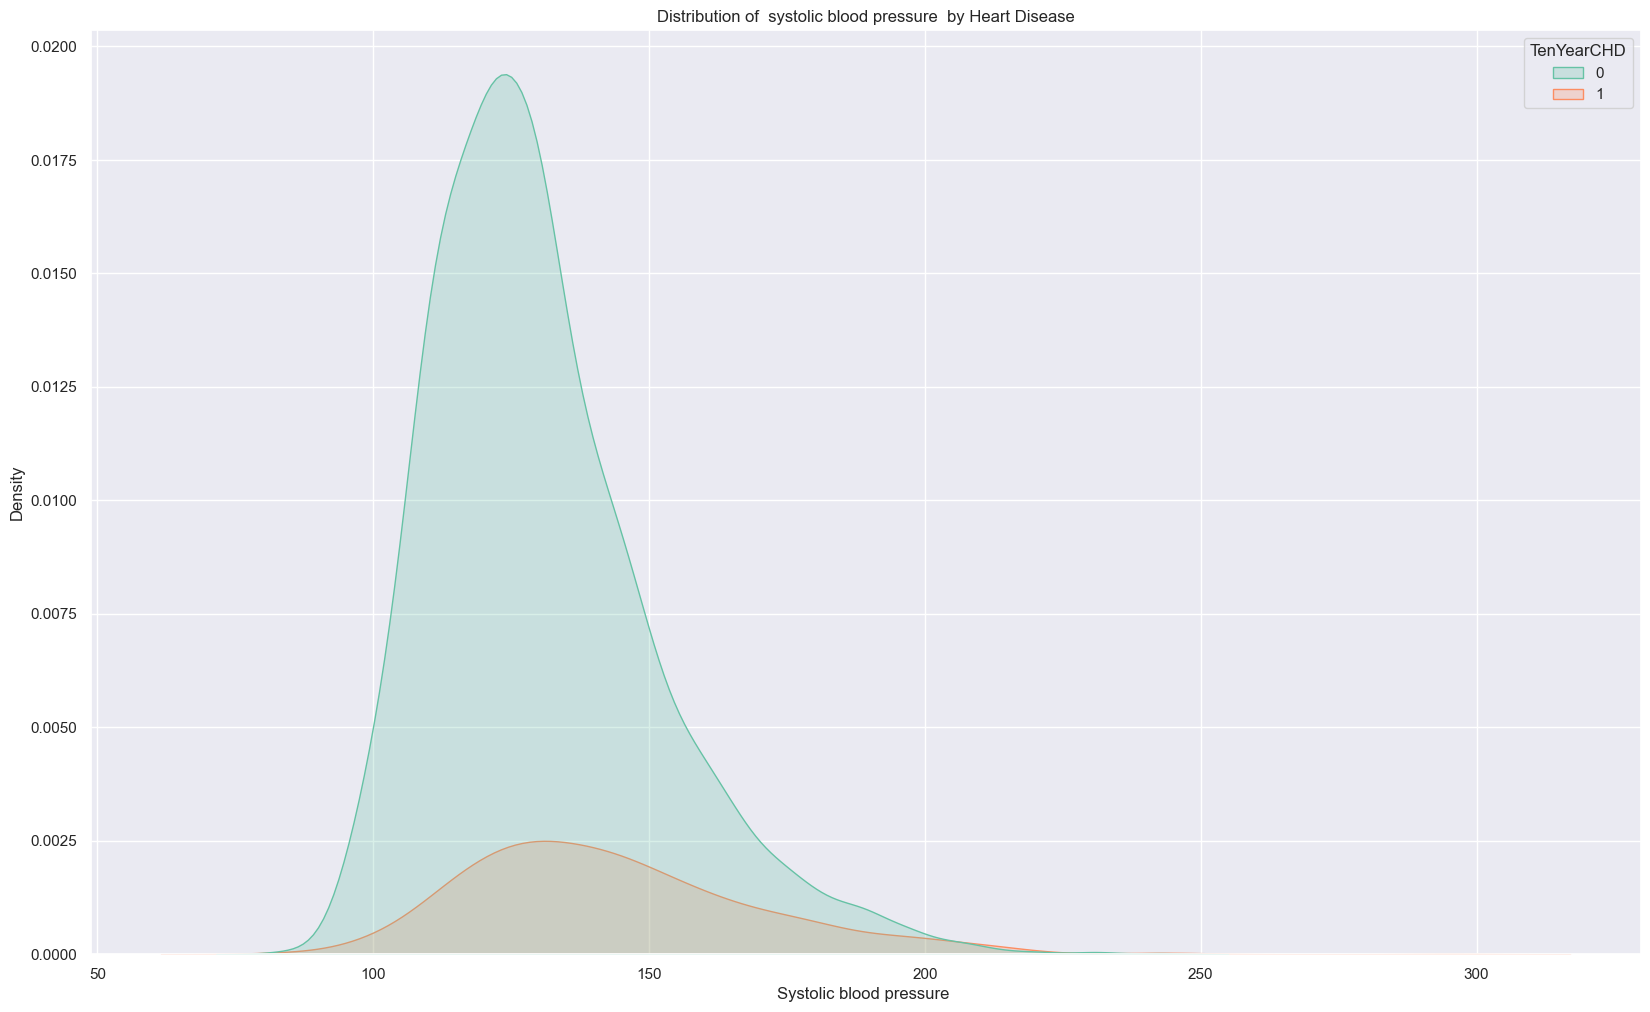

In [14]:
sns.set_style("darkgrid")
sns.kdeplot(x="sysBP",data=df,palette="Set2",hue="TenYearCHD",shade=True)
sns.set(rc={'figure.figsize':(20,12)})
plt.ylabel('Density');
plt.xlabel('Systolic blood pressure ');
plt.title('Distribution of  systolic blood pressure  by Heart Disease')

## 2.3 Data Preprocessing

<font color="green">
1.Dealing with Missing Values

In [15]:
df.isnull().sum().sort_values(ascending=False)

glucose            388
education          105
BPMeds              53
totChol             50
cigsPerDay          29
BMI                 19
heartRate            1
male                 0
age                  0
currentSmoker        0
prevalentStroke      0
prevalentHyp         0
diabetes             0
sysBP                0
diaBP                0
TenYearCHD           0
dtype: int64

In [16]:
missing_columns = ["glucose", "education","BPMeds","totChol","cigsPerDay","BMI","heartRate"]
for i in missing_columns:
    print("Column :", i)
    print(df[i].nunique())
    print("******************************")

Column : glucose
143
******************************
Column : education
4
******************************
Column : BPMeds
2
******************************
Column : totChol
248
******************************
Column : cigsPerDay
33
******************************
Column : BMI
1363
******************************
Column : heartRate
73
******************************


<font color="green">
We will replace columns with continuous values with mean while columns with discrete values with median

In [17]:
df["glucose"].fillna(df["glucose"].mean(),inplace =True)
df["totChol"].fillna(df["totChol"].mean(),inplace=True)
df["cigsPerDay"].fillna(df["cigsPerDay"].mean(),inplace=True)
df["BMI"].fillna(df["BMI"].mean(),inplace=True)
df["heartRate"].fillna(df["heartRate"].mean(),inplace=True)
df["education"].fillna(df["education"].median(),inplace=True)
df["BPMeds"].fillna(df["BPMeds"].median(),inplace=True)

In [18]:
df.isnull().sum().sort_values(ascending=False)

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

<font color="green">
2.Data Normalization

In [19]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df[["cigsPerDay","totChol","sysBP","diaBP","BMI","heartRate","glucose","age"]]= ss.fit_transform(df[["cigsPerDay","totChol","sysBP","diaBP","BMI","heartRate","glucose","age"]])
df.head(3)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,-1.234951,4.0,0,-0.757974,0.0,0,0,0,-0.941346,-1.195907,-1.082625,0.286943,0.342744,-0.217517,0
1,0,-0.418257,2.0,0,-0.757974,0.0,0,0,0,0.299595,-0.515187,-0.158988,0.719325,1.590275,-0.261311,0
2,1,-0.184916,1.0,1,0.925835,0.0,0,0,0,0.186782,-0.220209,-0.242955,-0.113502,-0.073099,-0.524078,0


<font color="green">
3.Splitting Data into Training and Test Set

In [20]:
X = df.drop("TenYearCHD",axis=1)
y = df["TenYearCHD"]
print(X.columns)
print(y)

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')
0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4235    0
4236    0
4237    0
Name: TenYearCHD, Length: 4238, dtype: int64


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3390, 15)
(848, 15)
(3390,)
(848,)


### Model Training with Logistic Regression

Use Logistic Regression to build a basic model on the data.  

In [22]:
lgr_pipe=Pipeline(
    steps=[('scale',StandardScaler()),
           ('lrg',LogisticRegression())]
)

In [23]:
start_time = time.time()
lgr=lgr_pipe.fit(X_train,y_train)
end_time = time.time()
lgr_time = end_time - start_time

In [24]:
train_lgr_pred=lgr.predict(X_train)
test_lgr_pred=lgr.predict(X_test)

In [25]:
print(classification_report(y_test,test_lgr_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.60      0.07      0.13       124

    accuracy                           0.86       848
   macro avg       0.73      0.53      0.53       848
weighted avg       0.82      0.86      0.81       848



### Score the Model

What is the accuracy of your model?

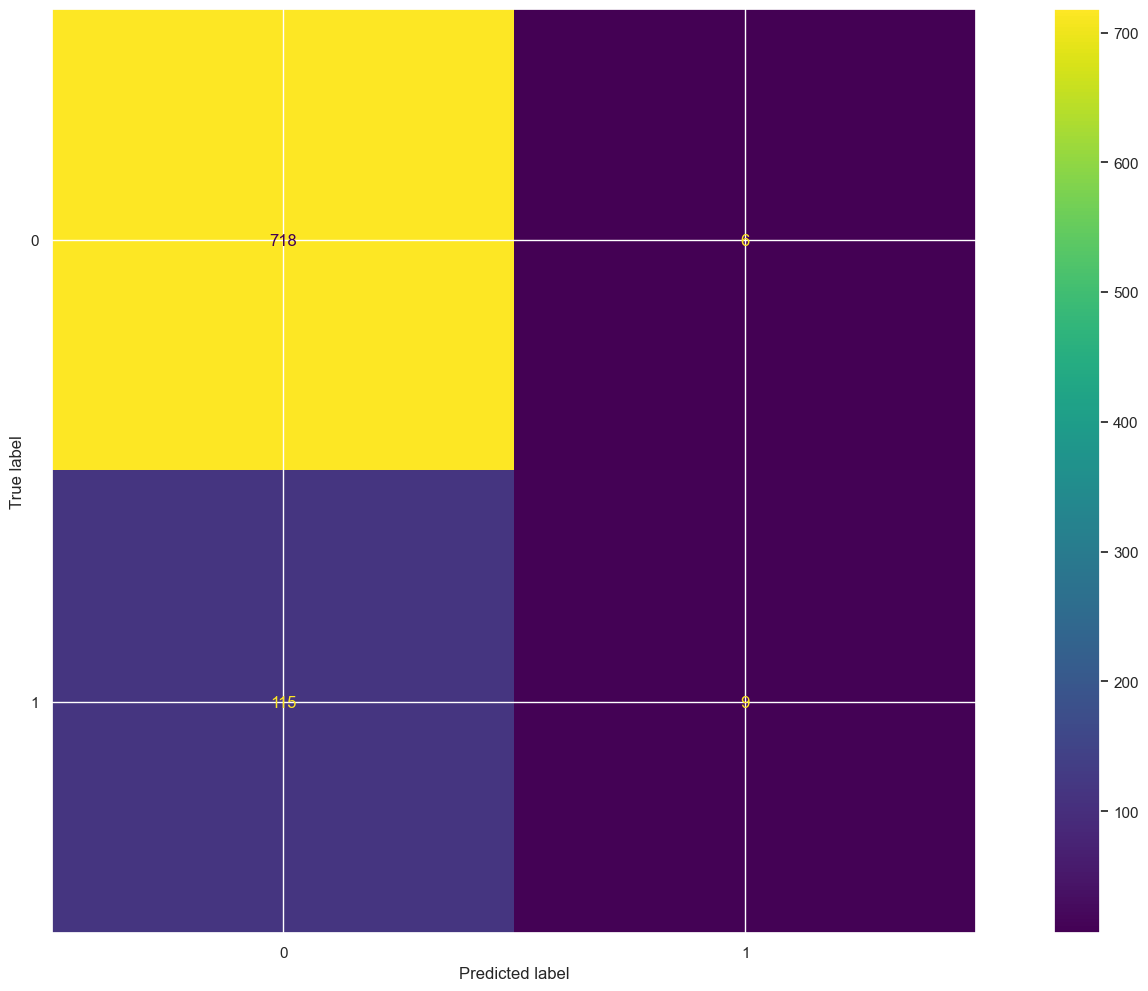

In [26]:
test_lgr_confusion=confusion_matrix(y_test,test_lgr_pred)
disp_test_dtree=ConfusionMatrixDisplay(test_lgr_confusion)
disp_test_dtree.plot()
plt.show()

In [27]:
lgr_test_accuracy_score=accuracy_score(test_lgr_pred,y_test)
lgr_train_accuracy_score=accuracy_score(train_lgr_pred,y_train)
lgr_test_accuracy_score, lgr_train_accuracy_score

(0.8573113207547169, 0.8545722713864307)

In [28]:
lgr_test_precision_score=precision_score(test_lgr_pred,y_test,average='weighted')
lgr_test_precision_score

0.9754544749531748

In [29]:
lgr_test_recall_score=recall_score(test_lgr_pred,y_test,average='weighted')
lgr_test_recall_score

0.8573113207547169

### Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, we will compare the fit time of each of the models.  We will present the findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [30]:
#K nearst neighbor pipelines
knn_pipe=Pipeline(
    steps=[('scale',StandardScaler()),
          ('knn', KNeighborsClassifier())]
)

#Decision tree pipelines
dtree_pipe=Pipeline(
    steps=[('scale',StandardScaler()),
           ('dtree',DecisionTreeClassifier())]
)

#Support Vector Machine pipelines
svc_pipe=Pipeline(
    steps=[('scale',StandardScaler()),
          ('svc',SVC())]
)

In [31]:
start_time = time.time()
knn=knn_pipe.fit(X_train,y_train)
end_time = time.time()
knn_time = end_time - start_time

In [32]:
train_knn_pred=knn.predict(X_train)
test_knn_pred=knn.predict(X_test)

In [33]:
knn_train_accurcy_score=accuracy_score(train_knn_pred,y_train)
knn_test_accuracy_score=accuracy_score(test_knn_pred,y_test)
knn_train_accurcy_score,knn_test_accuracy_score

(0.8678466076696165, 0.8349056603773585)

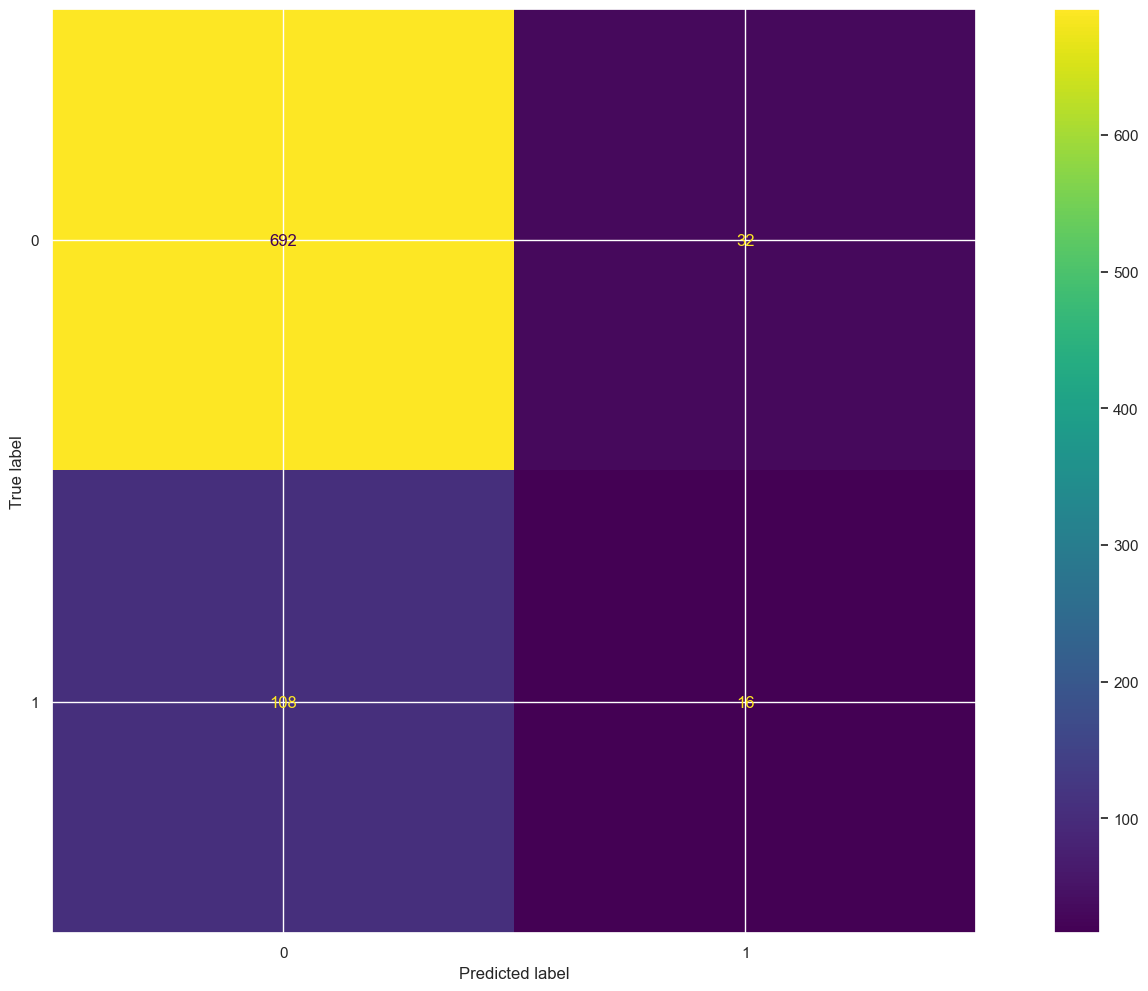

In [34]:
test_knn_confusion=confusion_matrix(y_test,test_knn_pred)
disp_test_dtree=ConfusionMatrixDisplay(test_knn_confusion)
disp_test_dtree.plot()
plt.show()

In [35]:
start_time = time.time()
dtree=dtree_pipe.fit(X_train,y_train)
end_time = time.time()
dtree_time = end_time - start_time

In [36]:
train_dtree_pred=dtree.predict(X_train)
test_dtree_pred=dtree.predict(X_test)

In [37]:
dtree_train_accuracy_score=accuracy_score(train_dtree_pred,y_train)
dtree_test_accuracy_score=accuracy_score(test_dtree_pred,y_test)
dtree_train_accuracy_score,dtree_test_accuracy_score

(1.0, 0.7712264150943396)

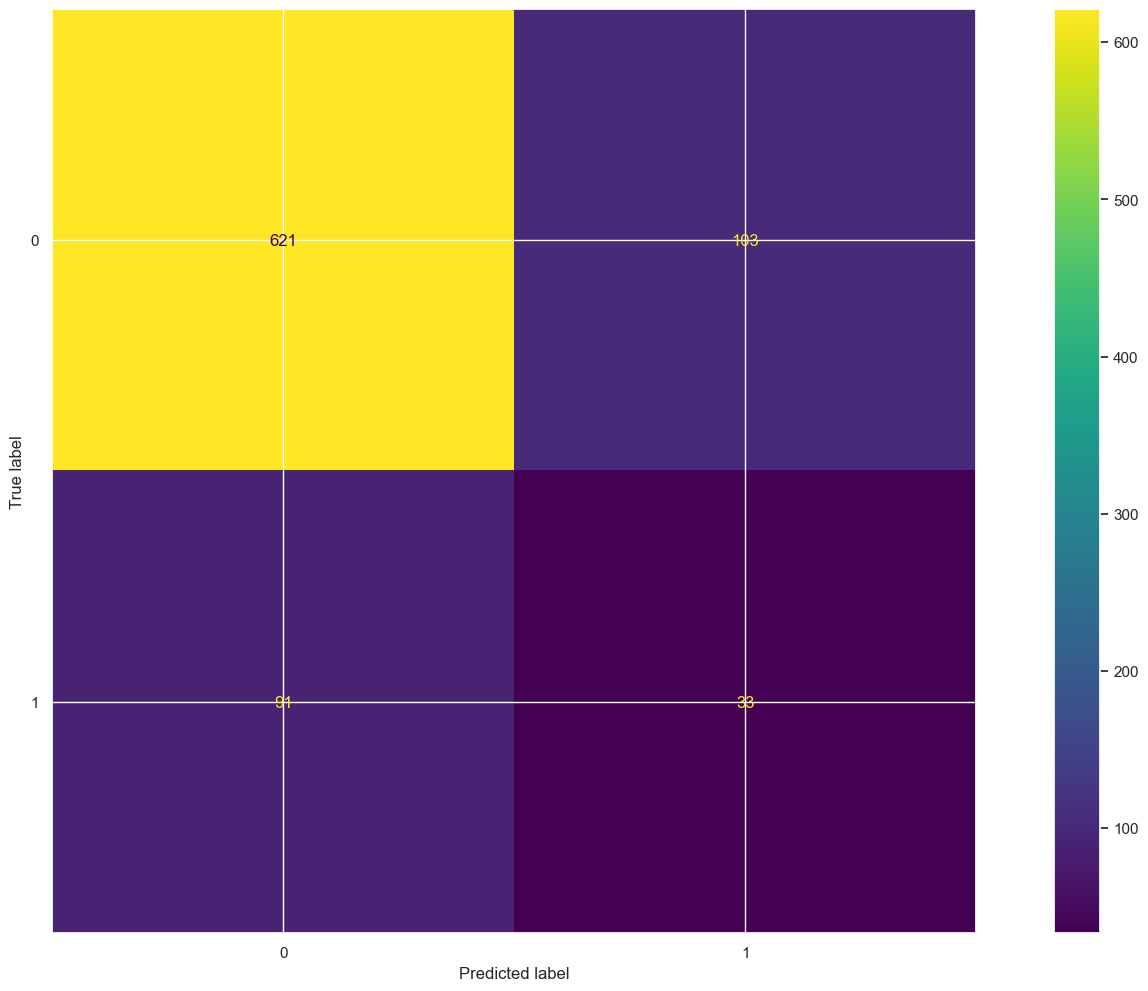

In [38]:
test_dtree_confusion=confusion_matrix(y_test,test_dtree_pred)
disp_test_dtree=ConfusionMatrixDisplay(test_dtree_confusion)
disp_test_dtree.plot()
plt.show()

In [39]:
start_time = time.time()
svc=svc_pipe.fit(X_train,y_train)
end_time = time.time()
svc_time = end_time - start_time

In [40]:
train_svc_pred=svc.predict(X_train)
test_svc_pred=svc.predict(X_test)

In [41]:
svc_train_accuracy_score=accuracy_score(train_svc_pred,y_train)
svc_test_accuracy_score=accuracy_score(test_svc_pred,y_test)
svc_train_accuracy_score,svc_test_accuracy_score

(0.8578171091445428, 0.8549528301886793)

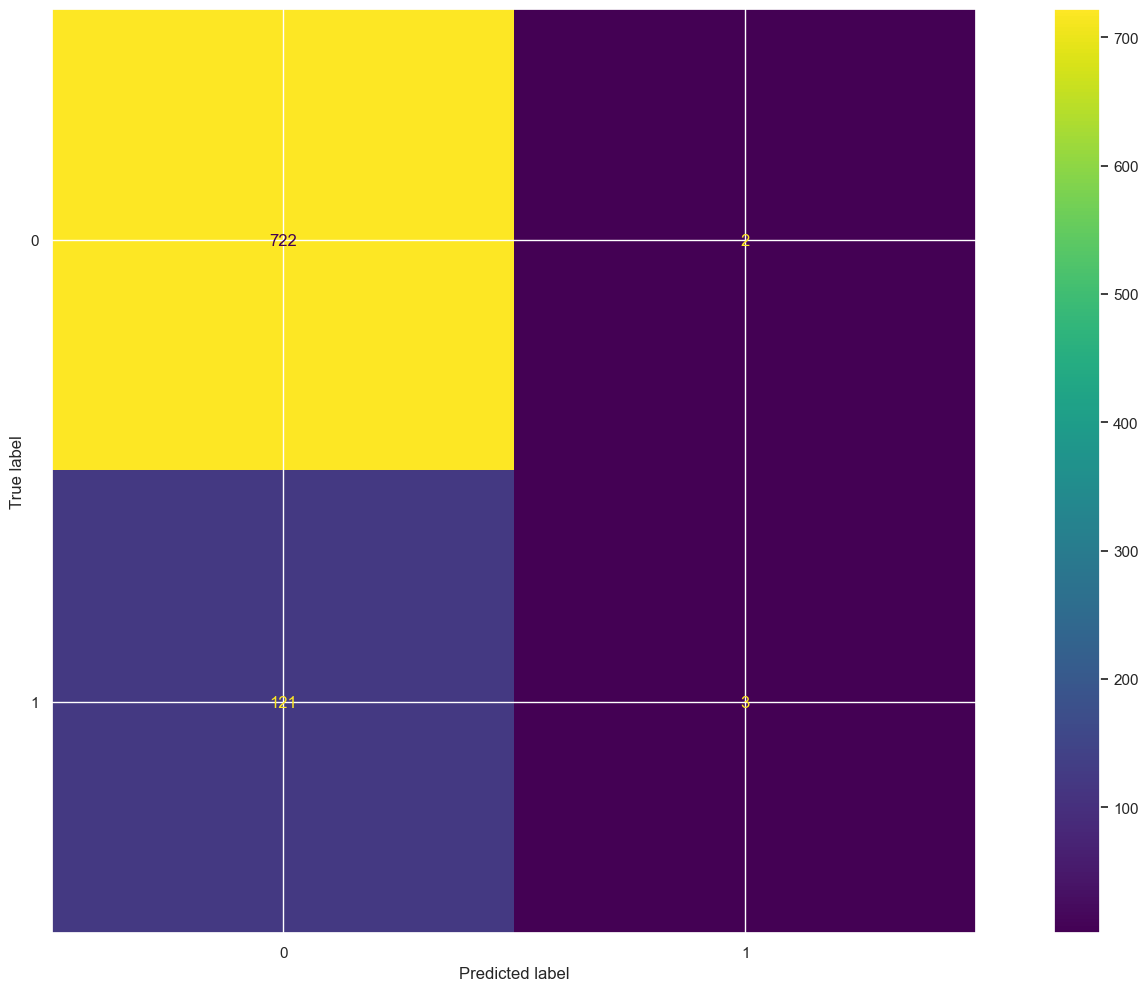

In [42]:
test_svc_confusion=confusion_matrix(y_test,test_svc_pred)
disp_test_dtree=ConfusionMatrixDisplay(test_svc_confusion)
disp_test_dtree.plot()
plt.show()

In [43]:
#precision score
model_perf = pd.DataFrame({'model':['KNN','Dtree','LGR','SVM'],
              'train_accuracy':[knn_train_accurcy_score,dtree_train_accuracy_score,lgr_train_accuracy_score,svc_train_accuracy_score],
              'test_accuracy ':[knn_test_accuracy_score,dtree_test_accuracy_score,lgr_test_accuracy_score,svc_test_accuracy_score],
              'train_time (sec)':[knn_time,dtree_time, lgr_time,svc_time]})
model_perf

,model,train_accuracy,test_accuracy,train_time (sec)
0,KNN,0.867847,0.834906,0.008568
1,Dtree,1.000000,0.771226,0.024965
2,LGR,0.854572,0.857311,0.014206
3,SVM,0.857817,0.854953,0.337770


### GridSearchCV for each models

In [44]:
#logestic regression

lgr_params={
                'lrg__C':[0.001,.009,0.01,.09,1,5,10,25]}
#K nearst neibour hyperparamers dictionary
knn_params={'knn__n_neighbors':range(1,6,2),
        'knn__weights':['uniform','distance'],
        'knn__p':[1,2]}

#Decision tree hyperparamers dictionary
dtree_params = {'dtree__max_depth':[2,4,6,8],
                'dtree__min_samples_split':[0.1, 0.2, 0.05],
                'dtree__criterion': ['gini','entropy'],
                'dtree__min_samples_leaf':[1,2,3]}

#Support vector machine hyperparamers dictionary
# this is taking super long
svc_params= {'svc__kernel': ['rbf','linear','sigmoid'],
              'svc__gamma': [0.1, 1.0],
              'svc__coef0':[1]}

#svc_params= {'svc__kernel': ['rbf','linear','sigmoid']}

In [45]:
lgr_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scale', 'lrg', 'scale__copy', 'scale__with_mean', 'scale__with_std', 'lrg__C', 'lrg__class_weight', 'lrg__dual', 'lrg__fit_intercept', 'lrg__intercept_scaling', 'lrg__l1_ratio', 'lrg__max_iter', 'lrg__multi_class', 'lrg__n_jobs', 'lrg__penalty', 'lrg__random_state', 'lrg__solver', 'lrg__tol', 'lrg__verbose', 'lrg__warm_start'])

In [46]:
start_time = time.time()
lgr_grid=GridSearchCV(estimator=lgr_pipe,
                      param_grid=lgr_params,
                      cv=5)
lgr=lgr_grid.fit(X_train,y_train)
end_time = time.time()
lgr_time = end_time - start_time

In [47]:
train_lgr_pred=lgr.predict(X_train)
test_lgr_pred=lgr.predict(X_test)

In [48]:
lgr_train_accurcy_score=accuracy_score(train_lgr_pred,y_train)
lgr_test_accuracy_score=accuracy_score(test_lgr_pred,y_test)
lgr_train_accurcy_score,lgr_test_accuracy_score

(0.8548672566371681, 0.8573113207547169)

KNN

In [49]:
start_time = time.time()
knn_grid=GridSearchCV(estimator=knn_pipe,
                      param_grid=knn_params,
                      cv=5)
knn=knn_grid.fit(X_train,y_train)
end_time = time.time()
knn_time = end_time - start_time

In [50]:
train_knn_pred=knn.predict(X_train)
test_knn_pred=knn.predict(X_test)

In [51]:
knn_train_accurcy_score=accuracy_score(train_knn_pred,y_train)
knn_test_accuracy_score=accuracy_score(test_knn_pred,y_test)
knn_train_accurcy_score,knn_test_accuracy_score

(0.8678466076696165, 0.8349056603773585)

In [52]:
start_time = time.time()
dtree_grid=GridSearchCV(estimator=dtree_pipe,
                      param_grid=dtree_params,
                      cv=5)
dtree=dtree_grid.fit(X_train,y_train)
end_time = time.time()
dtree_time = end_time - start_time

In [53]:
train_dtree_pred=dtree.predict(X_train)
test_dtree_pred=dtree.predict(X_test)

In [54]:
dtree_train_accuracy_score=accuracy_score(train_dtree_pred,y_train)
dtree_test_accuracy_score=accuracy_score(test_dtree_pred,y_test)
dtree_train_accuracy_score,dtree_test_accuracy_score

(0.8477876106194691, 0.8525943396226415)

In [55]:
start_time = time.time()
svc_grid=GridSearchCV(estimator=svc_pipe,
                      param_grid=svc_params,
                      cv=5)
svc=svc_grid.fit(X_train,y_train)
end_time = time.time()
svc_time = end_time - start_time

In [56]:
train_svc_pred=svc.predict(X_train)
test_svc_pred=svc.predict(X_test)

In [57]:
svc_train_accuracy_score=accuracy_score(train_svc_pred,y_train)
svc_test_accuracy_score=accuracy_score(test_svc_pred,y_test)
svc_train_accuracy_score,svc_test_accuracy_score

(0.8466076696165191, 0.8537735849056604)

In [58]:
#precision score with GridSearch
model_perf = pd.DataFrame({'model':['KNN','Dtree','LGR','SVM'],
              'train_accuracy':[knn_train_accurcy_score,dtree_train_accuracy_score,lgr_train_accuracy_score,svc_train_accuracy_score],
              'test_accuracy ':[knn_test_accuracy_score,dtree_test_accuracy_score,lgr_test_accuracy_score,svc_test_accuracy_score],
              'train_time (sec)':[knn_time,dtree_time, lgr_time,svc_time]})
model_perf

,model,train_accuracy,test_accuracy,train_time (sec)
0,KNN,0.867847,0.834906,3.257242
1,Dtree,0.847788,0.852594,3.662343
2,LGR,0.854572,0.857311,0.449949
3,SVM,0.846608,0.853774,6.714252


##### Questions

## Summary/Questions

``` Business Problem - The goal of this exercise is - Based on the health data available for someone, identify if that person has a 10-year risk of future coronary heart disease (CHD).```

```I first analyzed, visualized, and then cleaned the data.

After that, I split the data for training and testing. I created 4 models with default values for KNN, DTree, logistic regression, and SVM. I see that the highest test accuracy is with Logistic regression and SVM, KNN was also comparable, but training time for SVM was really high, and for KNN, it was really low. Based on this I would go with logistic regression, but the data sample is really small, so we need to run these models with more data before concluding. 

Here is the result

    model   train_accuracy  test_accuracy   train_time (sec)
model	train_accuracy	test_accuracy	train_time (sec)	summary
0	KNN	0.867847	0.834906	0.009213
1	Dtree	1.000000	0.774764	0.032423
2	LGR	0.854572	0.857311	0.020705
3	SVM	0.857817	0.854953	0.354813


I then used GridSearch for hyperparameter tuning and did the training and testing again, below are the results. Now all models have comparable test accuracy, but training time had huge variance, SVM and KNN took a long time (I had to remove some of the parameters to make it finish on time). Logistic regression finished in only 0.5 sec.

model	train_accuracy	test_accuracy	train_time (sec)	
0	KNN	0.867847	0.834906	3.332418
1	Dtree	0.847788	0.852594	3.672317
2	LGR	0.854572	0.857311	0.506328
3	SVM	0.846608	0.853774	6.749078


